Let's visualize the data from the PMSys dataset and find the connections between predictors and the dependent variable (readiness for training). 
Identified patterns can be generalized to a wider population and taken into account when drawing up a training plan.

In [2]:
from datetime import datetime
import json
import os
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import dateutil.parser

import seaborn as sns
sns.set(style="whitegrid")


In [3]:
with open('configs.json', 'r') as f:
    configs = json.load(f)

path = configs['DATA_DIRECTORY']

# get paths to srpe, wellness and injury subfolders
list_subfolders_with_paths = [f.path for f in os.scandir(path) if f.is_dir()]


In [4]:
# read datasets
srpe = pd.DataFrame()
wellness = pd.DataFrame()
injury = pd.DataFrame()

for i, path in enumerate(list_subfolders_with_paths):
    # read srpe data
    srpe_file = f'{path}\\pmsys\\srpe.csv'
    if os.path.exists(srpe_file):
        srpe_temp = pd.read_csv(srpe_file)
        srpe_temp['pid'] = i + 1
        srpe_temp['end_date_time'] = srpe_temp['end_date_time'].apply(lambda x: 
                                                                 datetime.utcfromtimestamp(int(dateutil.parser.parse(x).timestamp())))
        srpe_temp.sort_values('end_date_time', inplace=True)
        srpe = pd.concat([srpe, srpe_temp], ignore_index=True)
    else:
        print(f"File {srpe_file} doesn't exist!")

    # read wellness data
    wellness_file = f'{path}\\pmsys\\wellness.csv'  # effective_time_frame
    if os.path.exists(wellness_file):
        wellness_temp = pd.read_csv(wellness_file)
        wellness_temp['pid'] = i + 1
        wellness_temp['effective_time_frame'] = wellness_temp['effective_time_frame'].apply(
            lambda x: datetime.utcfromtimestamp(int(dateutil.parser.parse(x).timestamp()))
        )
        wellness_temp.sort_values('effective_time_frame', inplace=True)
        wellness = pd.concat([wellness, wellness_temp], ignore_index=True)
    else:
        print(f"File {wellness_file} doesn't exist!")

    # read injury data
    injury_file = f'{path}\\pmsys\\injury.csv'
    if os.path.exists(injury_file):
        injury_temp = pd.read_csv(injury_file)
        injury_temp['pid'] = i + 1
        injury_temp['effective_time_frame'] = injury_temp['effective_time_frame'].apply(
            lambda x: datetime.utcfromtimestamp(int(dateutil.parser.parse(x).timestamp()))
        )
        injury_temp.sort_values('effective_time_frame', inplace=True)
        injury = pd.concat([injury, injury_temp], ignore_index=True)
    else:
        print(f"File '{injury_file}' doesn't exist!")



File 'D:\Pet\Datasets\pmdata\p08\pmsys\injury.csv' doesn't exist!


In [5]:
srpe.head()

,end_date_time,activity_names,perceived_exertion,duration_min,pid
0,2019-11-05 22:51:54,"['individual', 'running']",7.0,30.0,1
1,2019-11-11 21:15:15,"['individual', 'running']",6.0,30.0,1
2,2019-11-14 21:00:53,"['team', 'soccer']",7.0,60.0,1
3,2019-11-18 21:34:44,"['individual', 'endurance']",6.0,50.0,1
4,2019-11-21 21:06:25,"['team', 'soccer']",6.0,70.0,1


In [6]:
print("****************** SRPE ******************")
print("Total numbers of records:", len(srpe))
print("Number of entries equal to null:")
print("   end_date_time: ", len(srpe.loc[srpe['end_date_time'].isnull()])) 
print("   perceived_exertion: ", len(srpe.loc[srpe['perceived_exertion'].isnull()]))
print("   duration_min: ", len(srpe.loc[srpe['duration_min'].isnull()]))

****************** SRPE ******************
Total numbers of records: 783
Number of entries equal to null:
   end_date_time:  0
   perceived_exertion:  11
   duration_min:  11


In [7]:
srpe['date'] = srpe['end_date_time'].apply(lambda x: x.date())

duplicate_rows = srpe.loc[:, ['end_date_time', 'pid', 'date']][srpe.duplicated(['date', 'pid'])]
print('Number of duplicated rows: ', len(duplicate_rows))

Number of duplicated rows:  53


In [8]:
srpe_aggregated = srpe.groupby(['date', 'pid']).aggregate({'perceived_exertion': 'sum', 'duration_min': 'sum'}).reset_index()

srpe_aggregated.head()

,date,pid,perceived_exertion,duration_min
0,2019-11-01,4,6.0,40.0
1,2019-11-02,6,8.0,40.0
2,2019-11-03,2,13.0,190.0
3,2019-11-04,6,6.0,40.0
4,2019-11-05,1,7.0,30.0


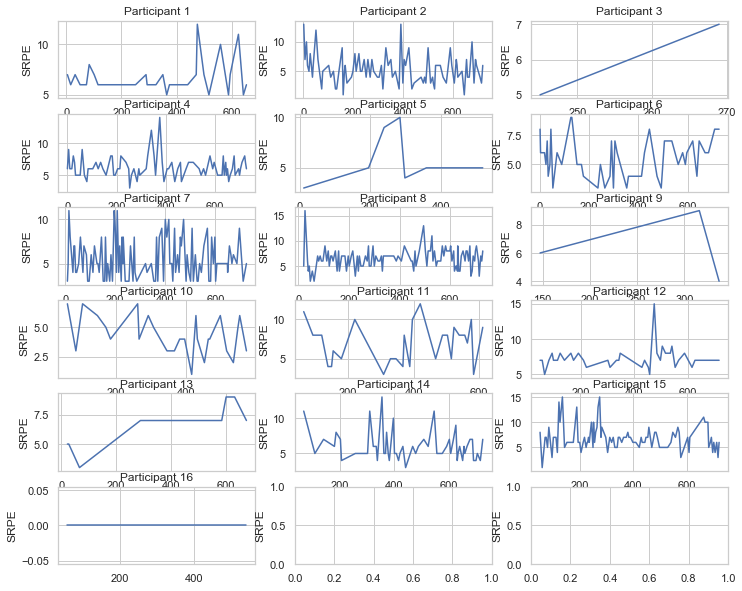

In [9]:
fig, axs = plt.subplots(int(np.ceil(len(srpe_aggregated['pid'].unique()) / 3)), 3, figsize=(12, 10))

for pid in srpe_aggregated['pid'].unique():
    axs[int((pid-1) // 3), int((pid-1) % 3)].plot(
        srpe_aggregated.loc[srpe_aggregated['pid'] == pid, 'perceived_exertion']
    )
    axs[int((pid-1) // 3), int((pid-1) % 3)].set_title(f'Participant {pid}')

for ax in axs.flat:
    ax.set(ylabel='SRPE')


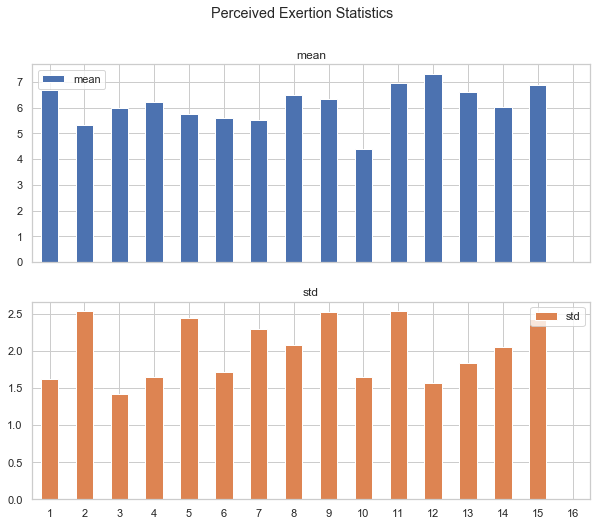

In [10]:
# a mean and std of perceived exertion for each person
perceived_exertion_statistics = pd.DataFrame(columns=['pid', 'mean', 'std'])

for pid, group in srpe_aggregated.groupby('pid'):
    perceived_exertion_statistics = perceived_exertion_statistics.append(
        {
            'pid': pid,
            'mean': group['perceived_exertion'].mean(),           
            'std': group['perceived_exertion'].std()
        },
        ignore_index=True
    )


perceived_exertion_statistics.set_index('pid', inplace=True)
perceived_exertion_statistics.index = perceived_exertion_statistics.index.astype(int)
perceived_exertion_statistics.plot.bar(rot=0, subplots=True, figsize=(10, 8), title='Perceived Exertion Statistics')
plt.show()

In [11]:
wellness.head()

,effective_time_frame,fatigue,mood,readiness,sleep_duration_h,sleep_quality,soreness,soreness_area,stress,pid
0,2019-11-01 08:31:40,2,3,5,6,3,2,[12921003],3,1
1,2019-11-02 10:00:01,2,3,6,6,3,2,[12921003],3,1
2,2019-11-03 14:28:03,3,3,8,6,3,3,[],3,1
3,2019-11-04 07:05:28,3,3,8,6,3,3,[],3,1
4,2019-11-05 06:13:35,3,3,8,5,3,3,[],3,1


In [12]:
wellness.loc[wellness['soreness_area'] == '[]', 'soreness_area'] = None
wellness.loc[wellness["soreness_area"].notnull(), 'soreness_area'] = wellness.loc[wellness["soreness_area"].notnull(), 'soreness_area'].apply(lambda x: json.loads(x.replace("'", '"')))

In [13]:
print("***************** Wellness *****************")
print("Total numbers of records:", len(wellness))
print("Number of entries equal to null:")
print("   effective_time_frame: ", len(wellness.loc[wellness['effective_time_frame'].isnull()])) 
print("   fatigue: ", len(wellness.loc[wellness['fatigue'].isnull()]))
print("   mood: ", len(wellness.loc[wellness['mood'].isnull()]))
print("   readiness: ", len(wellness.loc[wellness['readiness'].isnull()]))
print("   sleep_duration_h: ", len(wellness.loc[wellness['sleep_duration_h'].isnull()]))
print("   sleep_quality: ", len(wellness.loc[wellness['sleep_quality'].isnull()]))
print("   soreness: ", len(wellness.loc[wellness['soreness'].isnull()]))
print("   soreness_area: ", len(wellness.loc[wellness['soreness_area'].isnull()]))
print("   stress: ", len(wellness.loc[wellness['stress'].isnull()]))

***************** Wellness *****************
Total numbers of records: 1747
Number of entries equal to null:
   effective_time_frame:  0
   fatigue:  0
   mood:  0
   readiness:  0
   sleep_duration_h:  0
   sleep_quality:  0
   soreness:  0
   soreness_area:  1372
   stress:  0


In [14]:
wellness['date'] = wellness['effective_time_frame'].apply(lambda x: x.date())


Plot a readiness of each participant

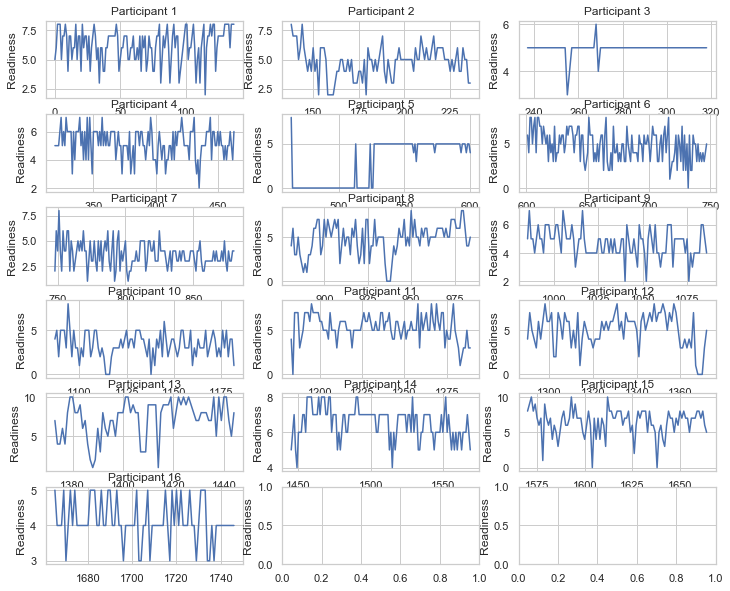

In [15]:
fig, axs = plt.subplots(int(np.ceil(len(wellness['pid'].unique()) / 3)), 3, figsize=(12, 10))

for pid in wellness['pid'].unique():
    to_plot = wellness.loc[wellness['pid'] == pid, 'readiness']
    axs[int((pid-1) // 3), int((pid-1) % 3)].plot(to_plot)
    axs[int((pid-1) // 3), int((pid-1) % 3)].set_title(f'Participant {pid}')

for ax in axs.flat:
    ax.set(ylabel='Readiness')


Injury

In [16]:
injury.head()

,effective_time_frame,injuries,pid
0,2019-11-07 06:39:48,{},1
1,2019-11-11 13:47:05,{},1
2,2019-11-18 08:28:53,{},1
3,2019-11-25 08:10:11,{},1
4,2019-12-02 08:10:19,{},1


In [17]:
injury.loc[injury['injuries'] == '{}', 'injuries'] = None
injury.loc[injury["injuries"].notnull(), 'injuries'] = injury.loc[injury["injuries"].notnull(), 'injuries'].apply(lambda x: json.loads(x.replace("'", '"')))

In [18]:
print("****************** Injury *******************")
print("Total numbers of records:", len(injury))
print("Number of entries equal to null:")
print("   effective_time_frame: ", len(injury.loc[injury['effective_time_frame'].isnull()])) 
print("   injuries: ", len(injury.loc[injury['injuries'].isnull()]))


****************** Injury *******************
Total numbers of records: 225
Number of entries equal to null:
   effective_time_frame:  0
   injuries:  148


In [19]:
injury['date'] = injury['effective_time_frame'].apply(lambda x: x.date())

A person can get several injuries in one day. Group by date field, map a difficultly of injury to numbers - {minor: 1, major: 2} and sum per day.

In [20]:
def severity(data):  
    _severity = 0
    for day_group in data['injuries'].values:
        for k, v in day_group.items():
            if v == 'minor':
                _severity += 1
            elif v == 'major':
                _severity += 2
            else:
                print('Different type of severity!')
    return _severity  


injury_severity = pd.DataFrame()

for pid, injury_group in injury.loc[injury["injuries"].notnull()].groupby('pid'):
    dates = list()
    severities = list()
    for date, group in injury_group.groupby('date'):
        dates.append(date)
        severities.append(severity(group))
    severity_temp = pd.DataFrame({'date': dates, 'injury_severity': severities})
    severity_temp['pid'] = pid
    severity_temp.sort_values('date', inplace=True)
    injury_severity = pd.concat([injury_severity, severity_temp], ignore_index=True)

In [21]:
injury_severity.head()

,date,injury_severity,pid
0,2020-01-07,1,1
1,2019-11-13,2,2
2,2019-11-26,1,4
3,2020-01-08,2,4
4,2020-01-26,2,4


In [22]:
print('The number of days with injury by participant id: ')
injury_severity['pid'].value_counts()

The number of days with injury by participant id: 


12    44
5     10
15     6
14     3
4      3
11     2
7      2
2      1
1      1
Name: pid, dtype: int64

In [23]:
df = wellness.merge(injury_severity, how='left', on=['pid', 'date'])

df = df.merge(srpe_aggregated.loc[:, ['date', 'pid', 'perceived_exertion', 'duration_min']], how='left', on=['pid', 'date'])

In [24]:
df.loc[df['injury_severity'].isnull(), 'injury_severity'] = 0
df.loc[df['perceived_exertion'].isnull(), 'perceived_exertion'] = 0
df.loc[df['duration_min'].isnull(), 'duration_min'] = 0

In [25]:
df.drop(columns=['effective_time_frame', 'soreness_area'], inplace=True)

In [26]:
df.head()

,fatigue,mood,readiness,sleep_duration_h,sleep_quality,soreness,stress,pid,date,injury_severity,perceived_exertion,duration_min
0,2,3,5,6,3,2,3,1,2019-11-01,0.0,0.0,0.0
1,2,3,6,6,3,2,3,1,2019-11-02,0.0,0.0,0.0
2,3,3,8,6,3,3,3,1,2019-11-03,0.0,0.0,0.0
3,3,3,8,6,3,3,3,1,2019-11-04,0.0,0.0,0.0
4,3,3,8,5,3,3,3,1,2019-11-05,0.0,7.0,30.0


In [27]:
len(df)

1747

In [28]:
df['pid'].value_counts()

6     147
4     145
1     138
5     137
7     133
14    125
11    107
8     104
9     102
2      99
10     96
15     95
12     83
16     82
3      82
13     72
Name: pid, dtype: int64

In [29]:
print('Non-NA cells for each column:')
df.count()

Non-NA cells for each column:


fatigue               1747
mood                  1747
readiness             1747
sleep_duration_h      1747
sleep_quality         1747
soreness              1747
stress                1747
pid                   1747
date                  1747
injury_severity       1747
perceived_exertion    1747
duration_min          1747
dtype: int64

Сalculate variables that express the total training load on the human body: SRPE, monotony and strain.

In [30]:
df['srpe'] = df['perceived_exertion'] * df['duration_min']

# Reflection of training variation across the week
# Monotony = Mean sRPE/Standard Deviation
df['monotony'] = df.groupby('pid')['srpe'].apply(lambda x: x.rolling(7).mean() / x.rolling(7).std())

# Reflection of overall training stress from the week
# Strain = Weekly sRPE*Monotony
df['strain'] = df.groupby('pid')['srpe'].apply(lambda x: x.rolling(7).sum() * (x.rolling(7).mean() / x.rolling(7).std()))

In [31]:
srpe_statistics = pd.DataFrame(columns=['pid', 'mean', 'std'])
monotony_statistics = pd.DataFrame(columns=['pid', 'mean', 'std'])
strain_statistics = pd.DataFrame(columns=['pid', 'mean', 'std'])

for pid, group in df.groupby('pid'):
    srpe_statistics = srpe_statistics.append(
        {
            'pid': pid,
            'mean': group['srpe'].mean(),            
            'std': group['srpe'].std()
        },
        ignore_index=True
    )
    
    monotony_statistics = monotony_statistics.append(
        {
            'pid': pid,
            'mean': group['monotony'].mean(),            
            'std': group['monotony'].std()
        },
        ignore_index=True
    )
    
    strain_statistics = strain_statistics.append(
        {
            'pid': pid,
            'mean': group['strain'].mean(),            
            'std': group['strain'].std()
        },
        ignore_index=True
    )   
    
srpe_statistics.set_index('pid', inplace=True)
monotony_statistics.set_index('pid', inplace=True)
strain_statistics.set_index('pid', inplace=True)

srpe_statistics.index = srpe_statistics.index.astype(int)
monotony_statistics.index = monotony_statistics.index.astype(int)
strain_statistics.index = strain_statistics.index.astype(int)
    

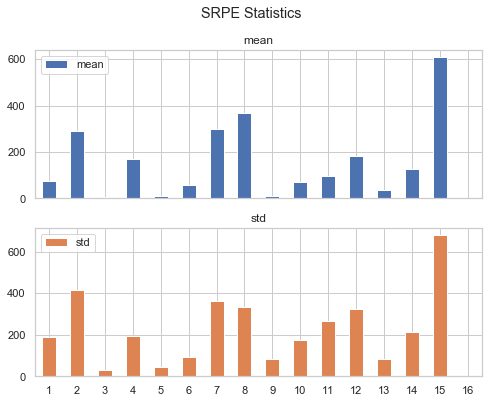

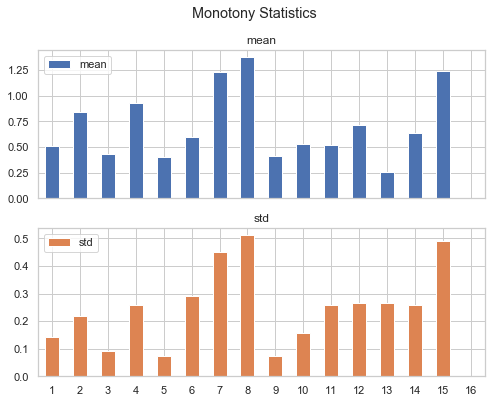

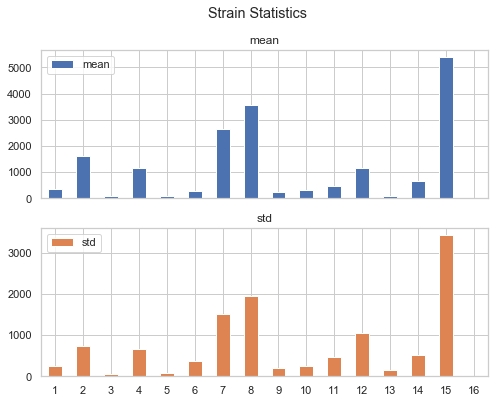

In [32]:
srpe_statistics.plot.bar(rot=0, subplots=True, figsize=(8, 6), title='SRPE Statistics')
monotony_statistics.plot.bar(rot=0, subplots=True, figsize=(8, 6), title='Monotony Statistics')
strain_statistics.plot.bar(rot=0, subplots=True, figsize=(8, 6), title='Strain Statistics')
plt.show()

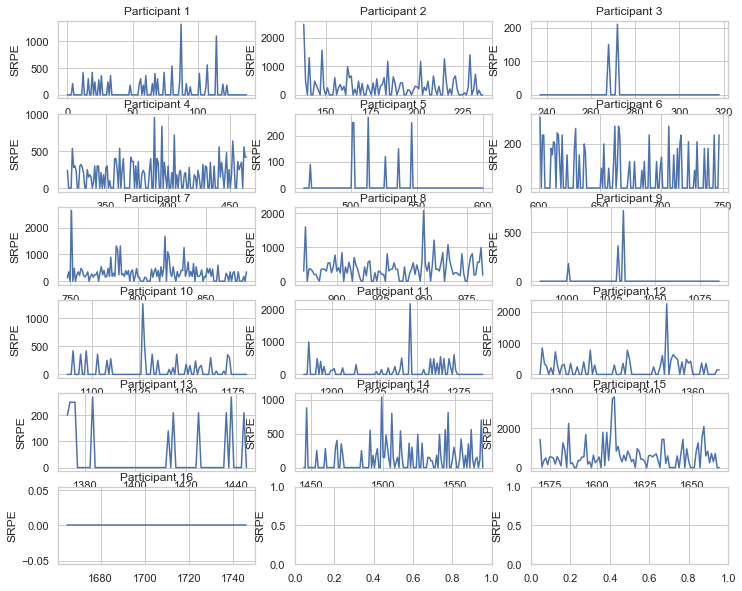

In [33]:
fig, axs = plt.subplots(int(np.ceil(len(df['pid'].unique()) / 3)), 3, figsize=(12, 10))

for pid in df['pid'].unique():
    y = df.loc[df['pid'] == pid, 'srpe']
    axs[int((pid-1) // 3), int((pid-1) % 3)].plot(y)
    axs[int((pid-1) // 3), int((pid-1) % 3)].set_title(f'Participant {pid}')

for ax in axs.flat:
    ax.set(ylabel='SRPE')


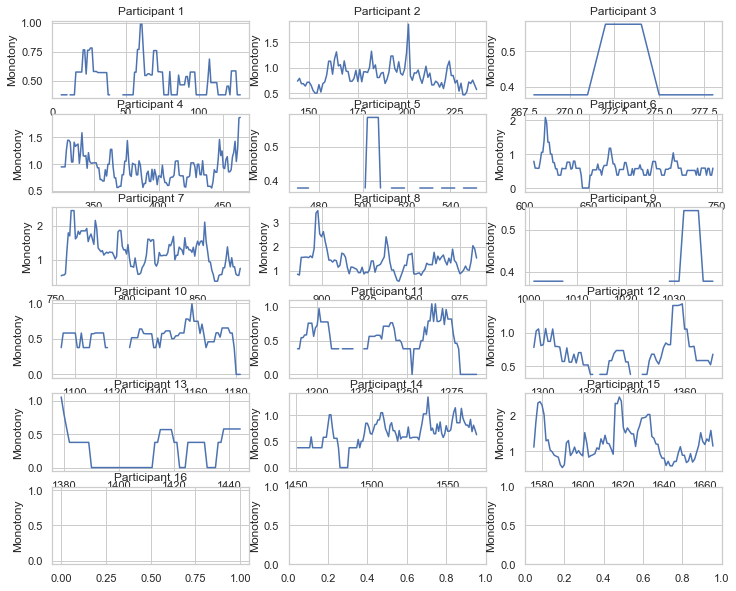

In [34]:
fig, axs = plt.subplots(int(np.ceil(len(df['pid'].unique()) / 3)), 3, figsize=(12, 10))

for pid in df['pid'].unique():
    y = df.loc[df['pid'] == pid, 'monotony']
    axs[int((pid-1) // 3), int((pid-1) % 3)].plot(y)
    axs[int((pid-1) // 3), int((pid-1) % 3)].set_title(f'Participant {pid}')

for ax in axs.flat:
    ax.set(ylabel='Monotony')

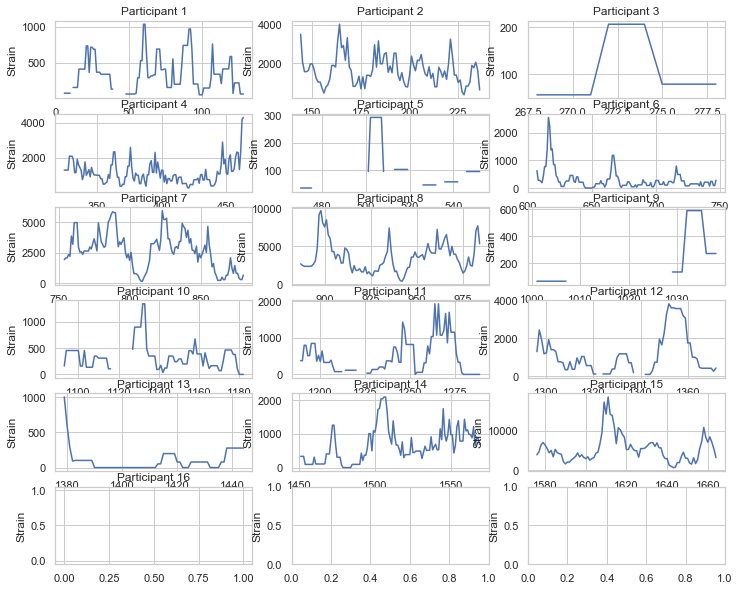

In [35]:
fig, axs = plt.subplots(int(np.ceil(len(df['pid'].unique()) / 3)), 3, figsize=(12, 10))

for pid in df['pid'].unique():
    y = df.loc[df['pid'] == pid, 'strain']
    axs[int((pid-1) // 3), int((pid-1) % 3)].plot(y)
    axs[int((pid-1) // 3), int((pid-1) % 3)].set_title(f'Participant {pid}')

for ax in axs.flat:
    ax.set(ylabel='Strain')



# Convert readiness values to three readiness levels: low(0), middle(1), high(2)

In [36]:
df['readiness_level'] = list(pd.cut(df['readiness'], 3, labels=[0, 1, 2]))

Let's look at the pairwise dependencies of the variables using the example of participants with the smallest(Participant id == 13) and largest(Participant id == 8) average monotony. 
A high level of training monotony would indicate that there is little variation in day to day training loads, which may be a cause for concern for excess fatigue accumulation. 
In contrast, a lower monotony score would indicate good fluctuation in day to loads, allowing for more recovery.[1]

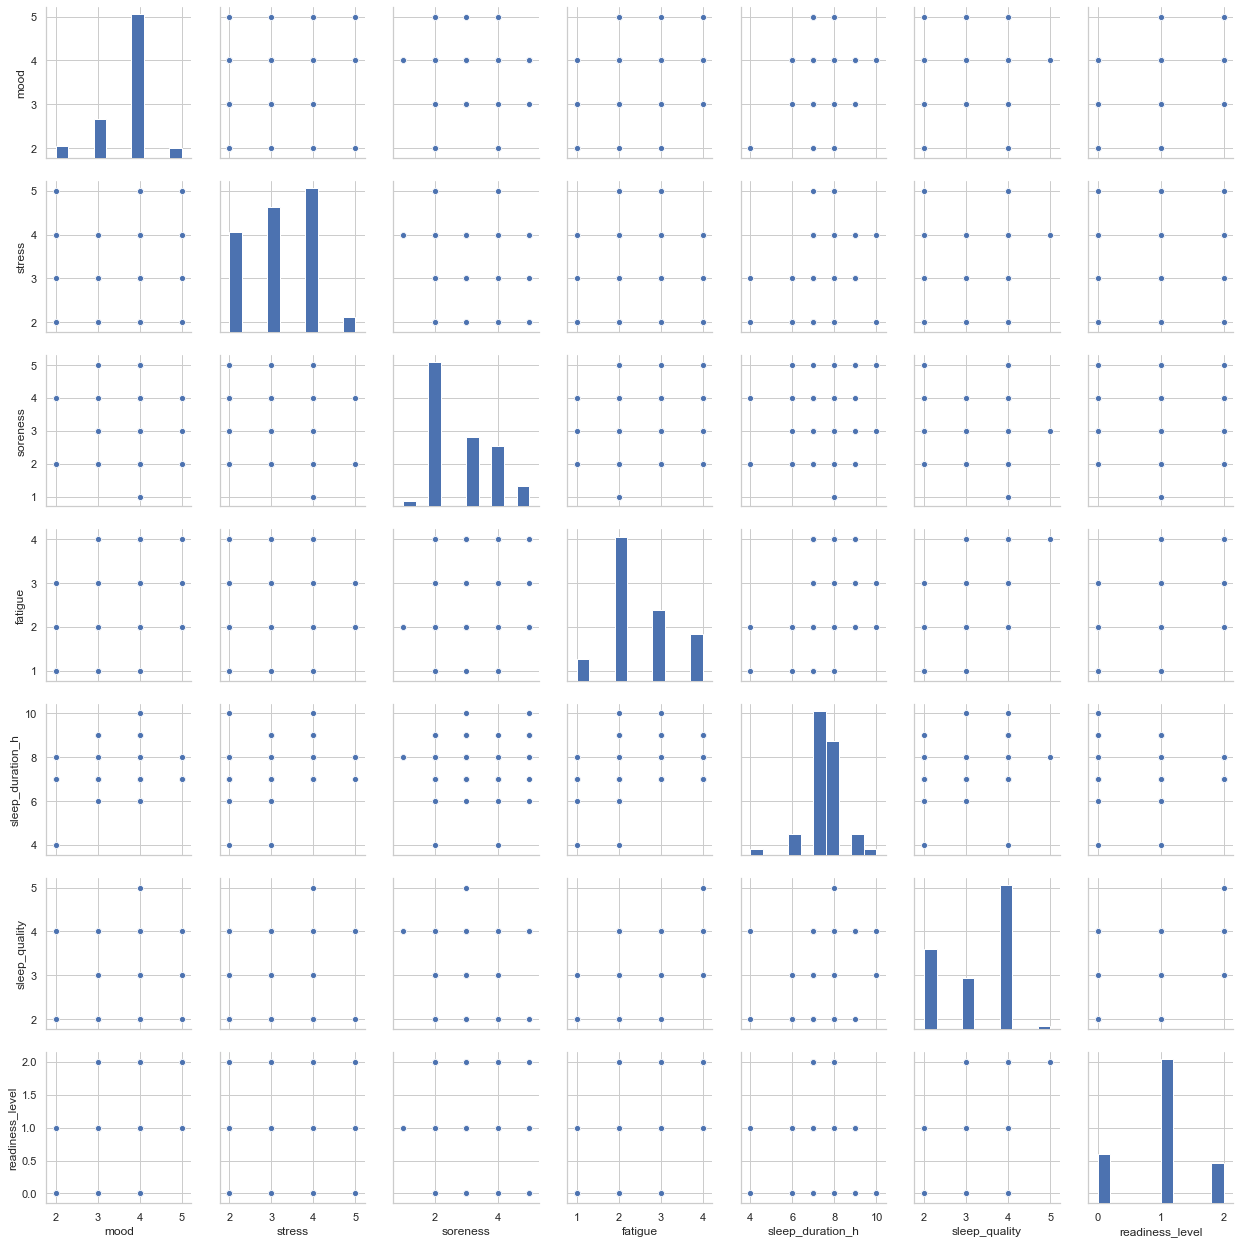

In [37]:
sns.pairplot(
    df.loc[
        df['pid'] == 8, ['mood', 'stress', 'soreness', 'fatigue', 'sleep_duration_h', 'sleep_quality', 'readiness_level']
    ]
)

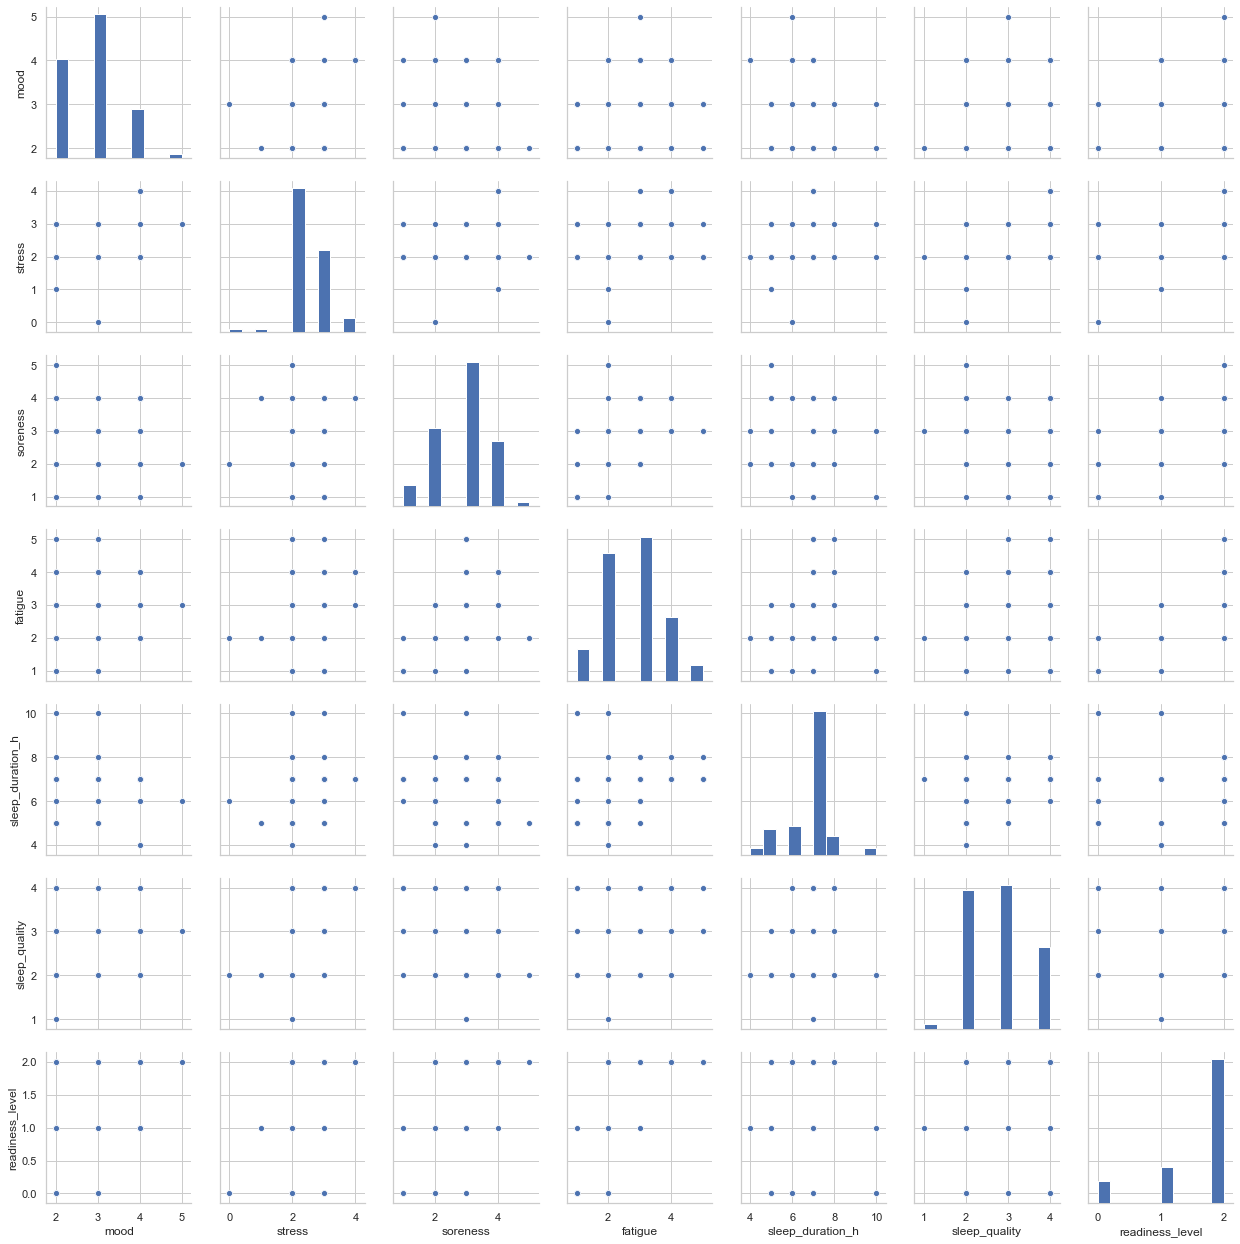

In [38]:
sns.pairplot(
    df.loc[
        df['pid'] == 13, ['mood', 'stress', 'soreness', 'fatigue', 'sleep_duration_h', 'sleep_quality', 'readiness_level']
    ]
)

As we can see participant (id == 13) with the smallest average monotony has a mostly high level of readiness and participant (id == 8) with the largest average monotony has a mostly middle level . 

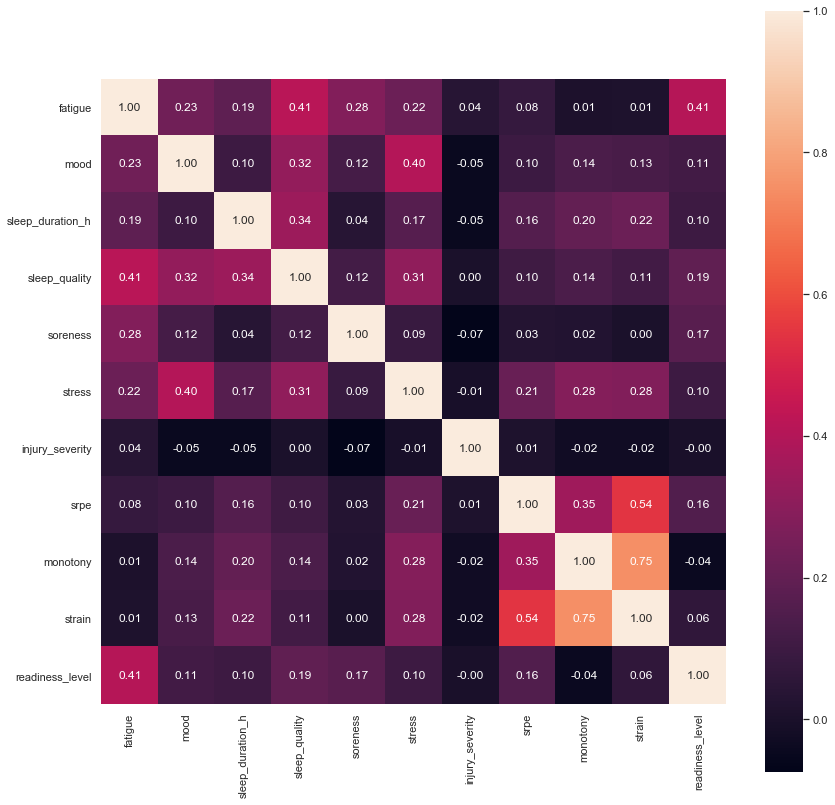

In [39]:
corr = df[df.columns[~df.columns.isin(['pid', 'date', 'perceived_exertion', 'duration_min', 'readiness'])]].dropna().corr()
plt.figure(figsize=(14, 14))
sns.set(font_scale=1)
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', xticklabels=True, yticklabels=True) 
plt.show()

Analysis of sports activity is a complex task. Many latent variables affect the result, for example, the number of calories consumed, age, health status, time of day etc.
The last two graphs confirm it. There are no obvious linear dependencies between predictors and the dependent variable - readiness_level, the relations are more complex, non-linear.

In [40]:
df.count()


fatigue               1747
mood                  1747
readiness             1747
sleep_duration_h      1747
sleep_quality         1747
soreness              1747
stress                1747
pid                   1747
date                  1747
injury_severity       1747
perceived_exertion    1747
duration_min          1747
srpe                  1747
monotony              1302
strain                1302
readiness_level       1747
dtype: int64

In [41]:
df.loc[df['monotony'].isnull(), 'monotony'] = -1
df.loc[df['strain'].isnull(), 'strain'] = -1

In [42]:
df.count()

fatigue               1747
mood                  1747
readiness             1747
sleep_duration_h      1747
sleep_quality         1747
soreness              1747
stress                1747
pid                   1747
date                  1747
injury_severity       1747
perceived_exertion    1747
duration_min          1747
srpe                  1747
monotony              1747
strain                1747
readiness_level       1747
dtype: int64

Prepare dataset to a training process

In [43]:
df[df.columns[~df.columns.isin(['date', 'perceived_exertion', 'duration_min', 'readiness'])]].to_csv('dataset.csv', index=False)

References

1. https://www.researchgate.net/publication/289128300_How_to_monitor_training_load_and_mode_using_sRPE